<a href="https://colab.research.google.com/github/Whyawww/Clustering-Audiens-YoutubeAPIv3/blob/main/Clustering_Audiens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME : **Wahyu Aji Nusantara**

---


CLUSTERING AUDIENS BERDASARKAN POLA ENGAGEMENT

In [ ]:
pip install pandas numpy seaborn matplotlib requests

In [ ]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import getpass
import os

if "kunciaja" not in os.environ :
  os.environ["kunciaja"] = getpass.getpass("Add API key")
  print("API key added to environment")
  kunciaja = os.environ["kunciaja"]
else :
  kunciaja = os.environ["kunciaja"]
  print("API key already in environment")

# Channel ID Deddy Corbuzier
CHANNEL_ID = "UCyM52LIpRooUwLH9bWCfkgw"

Add API key··········
API key added to environment


Mengambil Daftar Video dalam Playlist

In [ ]:
def get_videos_from_playlist(playlist_id, api_key):
    video_ids = []
    next_page_token = None

    while True:
        url = f"https://www.googleapis.com/youtube/v3/playlistItems?part=contentDetails&playlistId={playlist_id}&maxResults=50&key={api_key}"
        if next_page_token:
            url += f"&pageToken={next_page_token}"

        response = requests.get(url).json()

        # DEBUG: Cek response API
        print(response)

        for item in response.get("items", []):
            video_ids.append(item["contentDetails"]["videoId"])

        next_page_token = response.get("nextPageToken")
        if not next_page_token:
            break

    return video_ids

PLAYLIST_ID = "PLe_K9e2LM-il7CzfCt82ABBbfuqf2trmI"
API_KEY = os.environ["kunciaja"]

# Ambil video dari playlist
video_ids = get_videos_from_playlist(PLAYLIST_ID, API_KEY)
print(f"Total video ditemukan: {len(video_ids)}")

{'kind': 'youtube#playlistItemListResponse', 'etag': '4rnH6sGkOXe2gXW9rtKVs0z-q60', 'nextPageToken': 'EAAaHlBUOkNESWlFRFU1UkVRME56WTBRelV3TWpreU9USQ', 'items': [{'kind': 'youtube#playlistItem', 'etag': 'E6TppllElSVLGOlyKl02r5xxidw', 'id': 'UExlX0s5ZTJMTS1pbDdDemZDdDgyQUJCYmZ1cWYydHJtSS41NkI0NEY2RDEwNTU3Q0M2', 'contentDetails': {'videoId': 'EMZdc03JWEg', 'videoPublishedAt': '2023-09-15T04:20:00Z'}}, {'kind': 'youtube#playlistItem', 'etag': 'BjEdbnu5T2HO439gTp3mYP3Ej9U', 'id': 'UExlX0s5ZTJMTS1pbDdDemZDdDgyQUJCYmZ1cWYydHJtSS4yODlGNEE0NkRGMEEzMEQy', 'contentDetails': {'videoId': 'sNw4Hf9qeko', 'videoPublishedAt': '2023-09-23T01:46:00Z'}}, {'kind': 'youtube#playlistItem', 'etag': 'D0oXxuih0jkgXZNFmbhLYj9XOqE', 'id': 'UExlX0s5ZTJMTS1pbDdDemZDdDgyQUJCYmZ1cWYydHJtSS4wMTcyMDhGQUE4NTIzM0Y5', 'contentDetails': {'videoId': 'M3jIteZtZAo', 'videoPublishedAt': '2023-09-30T01:46:00Z'}}, {'kind': 'youtube#playlistItem', 'etag': 'IIg8t-UkLyFkJLiIrcaUg4WEMQs', 'id': 'UExlX0s5ZTJMTS1pbDdDemZDdDgyQUJCYmZ1c

Mengambil Statistik Engagement Setiap Video

In [ ]:
def get_video_statistics(video_ids, api_key):
    stats_list = []

    for video_id in video_ids:
        url = f"https://www.googleapis.com/youtube/v3/videos?part=statistics&id={video_id}&key={api_key}"
        response = requests.get(url).json()

        for item in response.get("items", []):
            stats = item.get("statistics", {})
            stats_list.append({
                "video_id": video_id,
                "views": int(stats.get("viewCount", 0)),
                "likes": int(stats.get("likeCount", 0)),
                "comments": int(stats.get("commentCount", 0))
            })

    return pd.DataFrame(stats_list)

# Mengambil statistik video
df = get_video_statistics(video_ids, API_KEY)

# Simpan ke CSV
df.to_csv("youtube_engagement_data.csv", index=False)
print("Data berhasil disimpan ke youtube_engagement_data.csv")

# Tampilkan beberapa baris pertama
df.head()

Data berhasil disimpan ke youtube_engagement_data.csv


,video_id,views,likes,comments
0,EMZdc03JWEg,4468261,60993,4168
1,sNw4Hf9qeko,5892436,76749,4166
2,M3jIteZtZAo,4720767,67760,3560
3,-j_yu-qc9eY,6193628,112660,4492
4,t7n4PW-ofNg,10377756,178708,7173


# **Data Understanding**

**Data Description**

In [ ]:
print("🔍 DATA DESCRIPTION")
print("="*40)

# Menampilkan 5 baris pertama data
print("📌 Sample Data:")
print(df.head())

# Melihat struktur dataset
print("\n📌 Informasi Data:")
print(df.info())

# Statistik deskriptif
print("\n📌 Statistik Deskriptif:")
print(df.describe())

🔍 DATA DESCRIPTION
📌 Sample Data:
      video_id     views   likes  comments
0  EMZdc03JWEg   4468261   60993      4168
1  sNw4Hf9qeko   5892436   76749      4166
2  M3jIteZtZAo   4720767   67760      3560
3  -j_yu-qc9eY   6193628  112660      4492
4  t7n4PW-ofNg  10377756  178708      7173

📌 Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   video_id  86 non-null     object
 1   views     86 non-null     int64 
 2   likes     86 non-null     int64 
 3   comments  86 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.8+ KB
None

📌 Statistik Deskriptif:
              views          likes      comments
count  8.600000e+01      86.000000     86.000000
mean   6.296602e+06  130140.825581   7298.767442
std    2.645620e+06   64544.495706   4634.183217
min    1.319669e+06   41629.000000   2117.000000
25%    4.484933e+06   87922.750000

**Data Exploration**


Missing Values Check:
video_id    0
views       0
likes       0
comments    0
dtype: int64


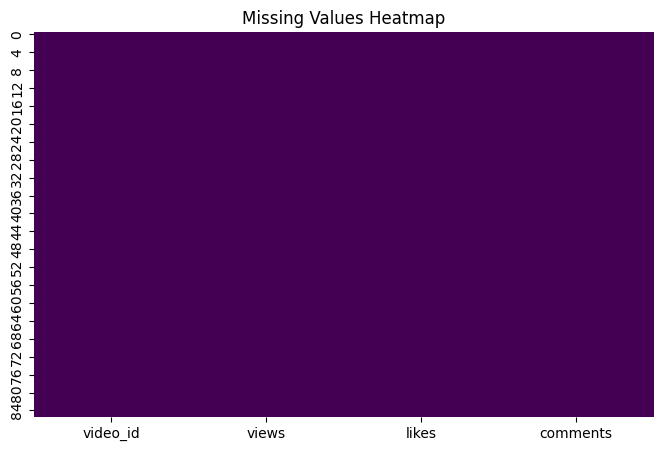

In [ ]:
print("\nMissing Values Check:")
missing_values = df.isnull().sum()
print(missing_values)

# Visualisasi missing values
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

Konsistensi data

In [ ]:
duplicate_rows = df[df.duplicated()]
print(f"Jumlah baris duplikat: {len(duplicate_rows)}")

Jumlah baris duplikat: 0


Akurasi Data

In [ ]:
invalid_fuel = df[(df['views'] < 0) | (df['likes'] < 0) | (df['comments'] < 0)]
print(f"Jumlah data yang tidak valid: {len(invalid_fuel)}")

Jumlah data yang tidak valid: 0


In [ ]:
duplcate_ids = df['video_id'].duplicated()
print(f"Jumlah ID video yang duplikat: {duplcate_ids.sum()}")

Jumlah ID video yang duplikat: 0


Cek Korelasi Antar Variabel

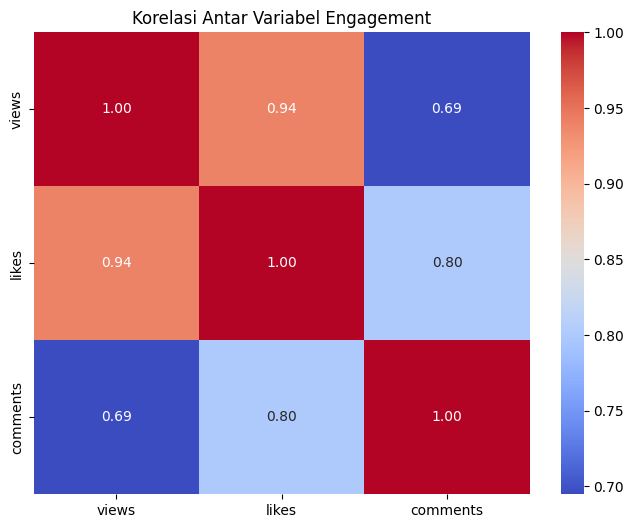

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['views', 'likes', 'comments']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Variabel Engagement")
plt.show()

Scatter Plot untuk melihat pola hubungan antar variabel

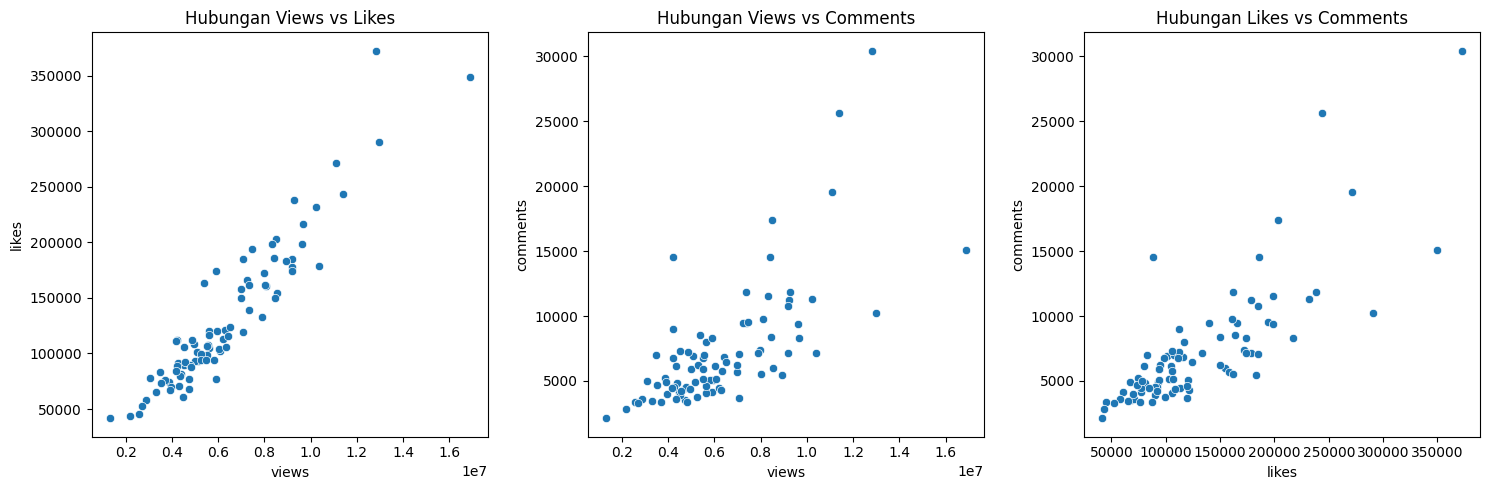

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

sns.scatterplot(x=df["views"], y=df["likes"], ax=ax[0])
ax[0].set_title("Hubungan Views vs Likes")

sns.scatterplot(x=df["views"], y=df["comments"], ax=ax[1])
ax[1].set_title("Hubungan Views vs Comments")

sns.scatterplot(x=df["likes"], y=df["comments"], ax=ax[2])
ax[2].set_title("Hubungan Likes vs Comments")

plt.tight_layout()

plt.show()

Distribusi Data

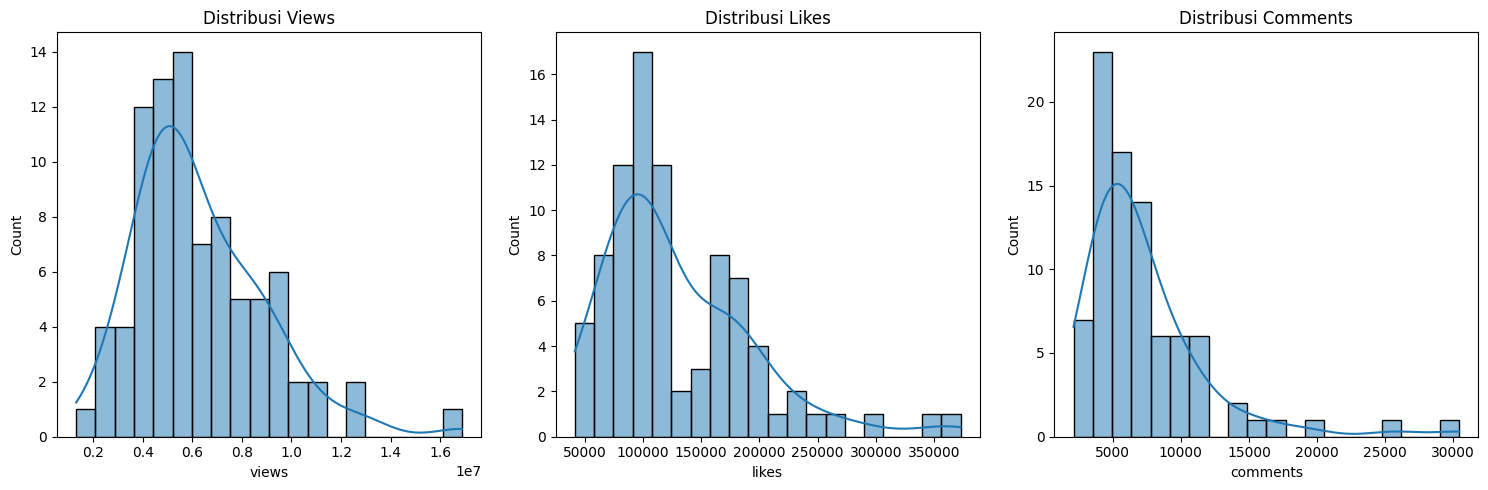

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

sns.histplot(df["views"], bins=20, kde=True, ax=ax[0])
ax[0].set_title("Distribusi Views")

sns.histplot(df["likes"], bins=20, kde=True, ax=ax[1])
ax[1].set_title("Distribusi Likes")

sns.histplot(df["comments"], bins=20, kde=True, ax=ax[2])
ax[2].set_title("Distribusi Comments")

plt.tight_layout()
plt.show()

**Data Quality Assessment**

In [ ]:
# Convert 'views', 'likes', and 'comments' komlom ke numerik
df['views'] = pd.to_numeric(df['views'])
df['likes'] = pd.to_numeric(df['likes'])
df['comments'] = pd.to_numeric(df['comments'])

# Deteksi Outlier
print("\n🔍 DATA QUALITY ASSESSMENT")
print("\nDeteksi Outlier dengan IQR Method")

# Memastikan df_selected berisi kolom numeric
df_selected = df[['views', 'likes', 'comments']]

Q1 = df_selected.quantile(0.25)
Q3 = df_selected.quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((df_selected < lower_bound) | (df_selected > upper_bound)).sum()
print(outliers)


🔍 DATA QUALITY ASSESSMENT

Deteksi Outlier dengan IQR Method
views       1
likes       3
comments    7
dtype: int64


Cek outline dengan boxplot

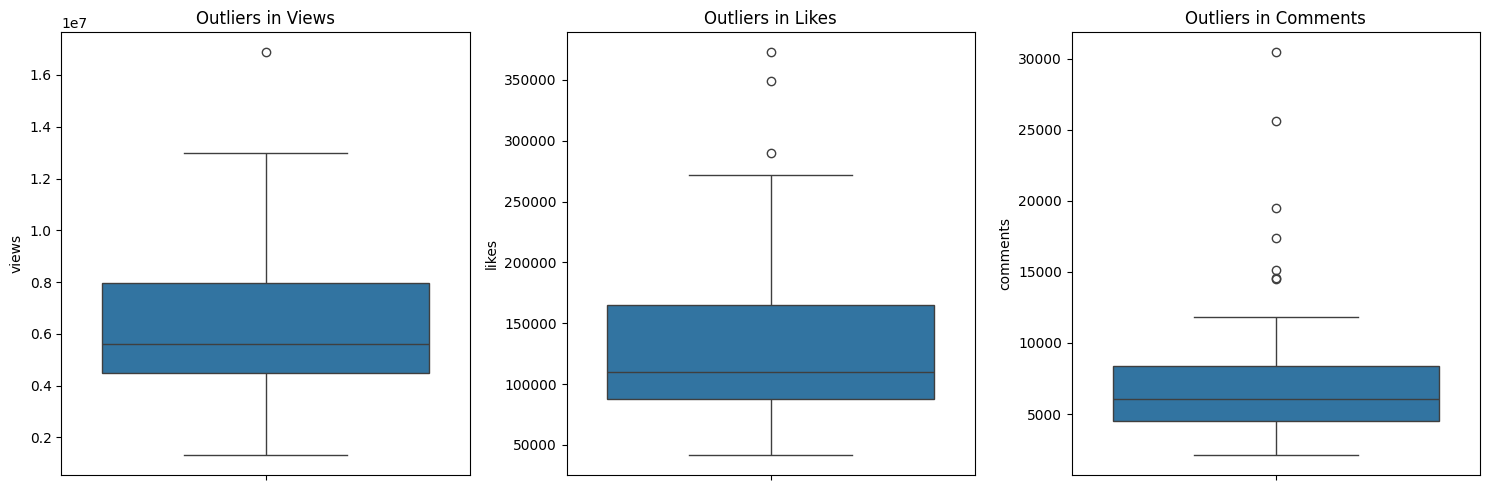

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

sns.boxplot(y=df["views"], ax=ax[0])
ax[0].set_title("Outliers in Views")

sns.boxplot(y=df["likes"], ax=ax[1])
ax[1].set_title("Outliers in Likes")

sns.boxplot(y=df["comments"], ax=ax[2])
ax[2].set_title("Outliers in Comments")

plt.tight_layout()
plt.show()

# **Data Preperation**

Data Selection

In [ ]:
# Menampilkan semua kolom
print("📌 Kolom yang tersedia:")
print(df.columns)

# Memilih hanya kolom yang relevan untuk clustering
df_selected = df[["views", "likes", "comments"]]
print("\n📌 Data setelah seleksi fitur:")
print(df_selected.head())


📌 Kolom yang tersedia:
Index(['video_id', 'views', 'likes', 'comments'], dtype='object')

📌 Data setelah seleksi fitur:
      views   likes  comments
0   4468261   60993      4168
1   5892436   76749      4166
2   4720767   67760      3560
3   6193628  112660      4492
4  10377756  178708      7173


Data Cleaning

In [ ]:
from scipy.stats import zscore

Q1 = df_selected.quantile(0.25)
Q3 = df_selected.quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

threshold = 3
# Menghapus outlier
df_cleaned = df_selected[~((df_selected < lower_bound) | (df_selected > upper_bound)).any(axis=1)]

print(f"\n📌 Data setelah membersihkan outlier (sebelumnya {df_selected.shape[0]}, sekarang {df_cleaned.shape[0]})")



📌 Data setelah membersihkan outlier (sebelumnya 86, sekarang 78)


Data Transformation

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned[['views', 'likes', 'comments']])
df_transformed = pd.DataFrame(scaled_data, columns=['views', 'likes', 'comments'])

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(df_transformed)
df_transformed['KMeans_labels'] = kmeans_labels
print(df_transformed.head())

      views     likes  comments  KMeans_labels
0 -0.678800 -1.228200 -0.849701              1
1  0.027843 -0.887441 -0.850555              2
2 -0.553512 -1.081848 -1.109258              1
3  0.177288 -0.110786 -0.711385              2
4  2.253358  1.317650  0.433142              0


Data Reduction


📌 Data setelah reduksi dimensi dengan PCA:
        PC1       PC2  Cluster
0 -1.656796 -0.149358        1
1 -0.877388  0.560892        1
2 -1.643773 -0.243262        1
3 -0.260309  0.390511        1
4  2.014921 -2.102530        0


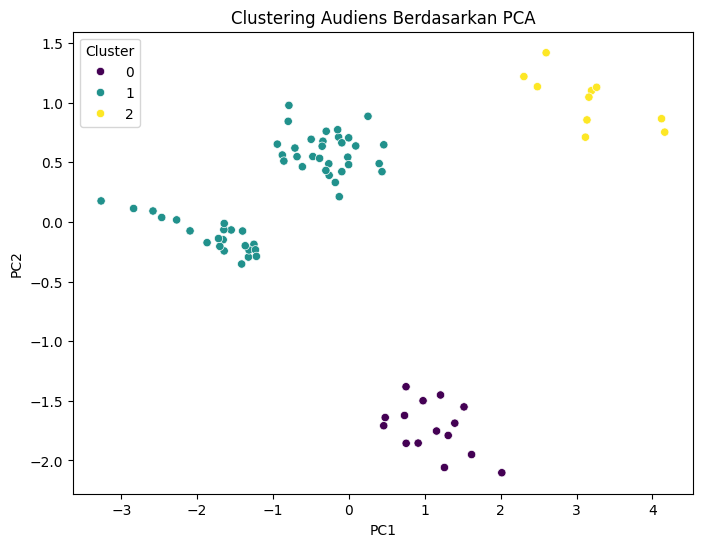

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Inisialisasi PCA untuk mereduksi ke 2 dimensi
pca = PCA(n_components=2, random_state=42)
df_reduced = pd.DataFrame(pca.fit_transform(df_transformed), columns=["PC1", "PC2"])

kmeans = KMeans(n_clusters=3, random_state=42)
df_reduced["Cluster"] = kmeans.fit_predict(df_reduced)

# Inisialisasi PCA untuk mereduksi ke 2 dimensi
print("\n📌 Data setelah reduksi dimensi dengan PCA:")
print(df_reduced.head())

# Visualisasi PCA
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_reduced["PC1"], y=df_reduced["PC2"], hue=df_reduced["Cluster"], palette="viridis")
plt.title("Clustering Audiens Berdasarkan PCA")
plt.show()

# **Modeling**

**K-MEANS**

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_transformed[['views', 'likes', 'comments']])

KMeans(n_clusters=3, random_state=42)

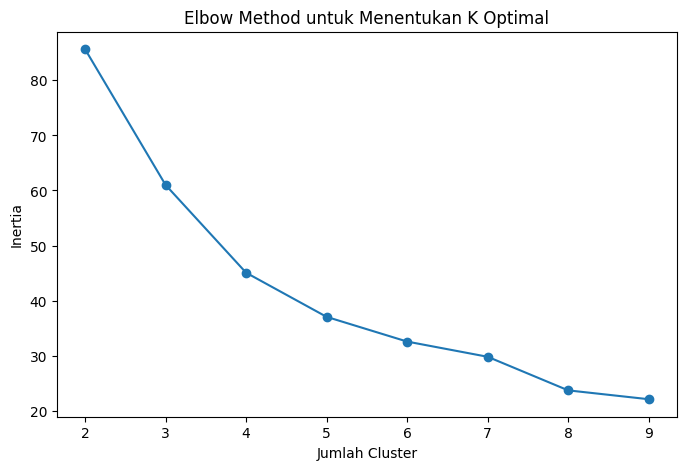

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Menentukan jumlah cluster optimal dengan Elbow Method
distortions = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_transformed[['views', 'likes', 'comments']])
    distortions.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K, distortions, marker="o")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")
plt.title("Elbow Method untuk Menentukan K Optimal")
plt.show()

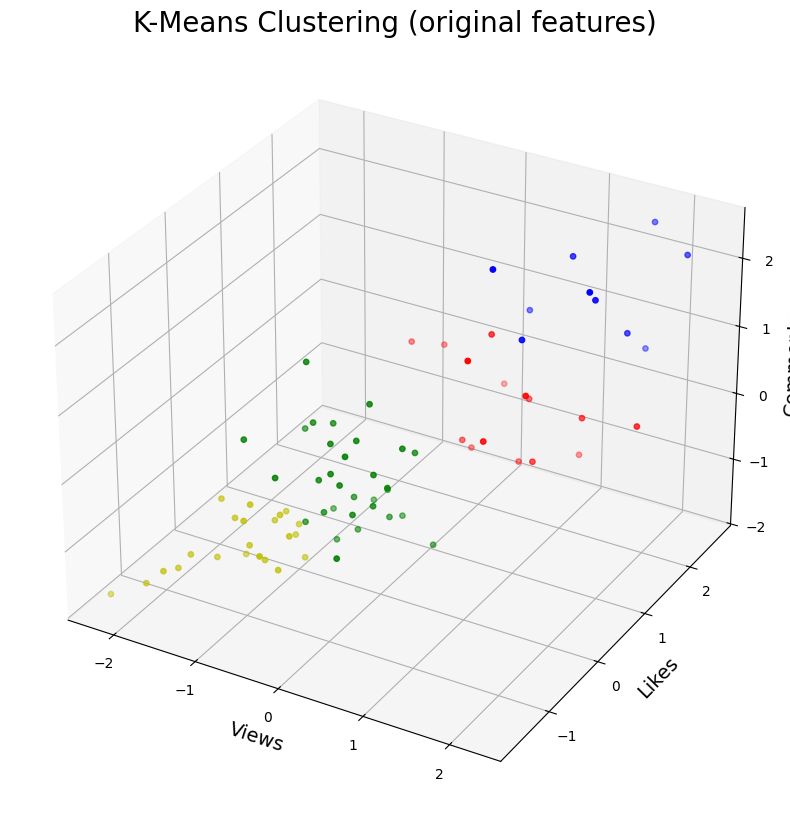

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(df_transformed)

# Buat dataframe asli + label
df_transformed = pd.DataFrame(df_transformed, columns=['views', 'likes', 'comments'])
df_transformed['KMeans_labels'] = kmeans_labels
colors = ['r', 'g', 'b', 'y']

# Visualisasi berdasarkan data asli yang sudah di-scale
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_transformed['views'], df_transformed['likes'], df_transformed['comments'],
           c=df_transformed['KMeans_labels'], cmap=matplotlib.colors.ListedColormap(colors), s=15)
ax.set_title('K-Means Clustering (original features)', fontsize=20)
ax.set_xlabel('Views', fontsize=14)
ax.set_ylabel('Likes', fontsize=14)
ax.set_zlabel('Comments', fontsize=14)
plt.show()

In [ ]:
k_means_opt = KMeans()

k_means_opt.fit(df_transformed[['views', 'likes', 'comments']])

df_transformed['k_means_opt_labels'] = k_means_opt.labels_
df_transformed['k_means_opt_labels'].value_counts()
print(df_transformed.head())

      views     likes  comments  KMeans_labels  k_means_opt_labels
0 -0.678800 -1.228200 -0.849701              3                   7
1  0.027843 -0.887441 -0.850555              1                   7
2 -0.553512 -1.081848 -1.109258              3                   7
3  0.177288 -0.110786 -0.711385              1                   5
4  2.253358  1.317650  0.433142              0                   1


**DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(df_transformed[['views', 'likes', 'comments']])

DBSCAN()

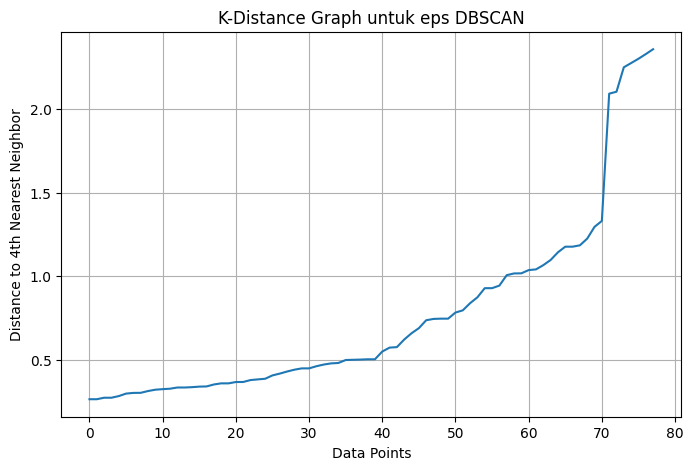

In [ ]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(df_transformed)
distances, indices = neighbors_fit.kneighbors(df_transformed)

# Urutkan lalu plot
distances = np.sort(distances[:, -1])
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.xlabel("Data Points")
plt.ylabel("Distance to 4th Nearest Neighbor")
plt.title("K-Distance Graph untuk eps DBSCAN")
plt.grid()
plt.show()


In [ ]:
df_transformed['DBSCAN_labels']=dbscan.labels_
print(df.head())

      video_id     views   likes  comments
0  EMZdc03JWEg   4468261   60993      4168
1  sNw4Hf9qeko   5892436   76749      4166
2  M3jIteZtZAo   4720767   67760      3560
3  -j_yu-qc9eY   6193628  112660      4492
4  t7n4PW-ofNg  10377756  178708      7173


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

best_score = -1
best_params = None

# Eksplorasi beberapa kombinasi eps dan min_samples
for eps in [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]:
    for min_samples in [2, 3, 4, 5]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_transformed)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        if n_clusters > 1:
            try:
                score = silhouette_score(df_transformed, labels)
                print(f"eps={eps}, min_samples={min_samples}, clusters={n_clusters}, silhouette={score:.4f}")
                if score > best_score:
                    best_score = score
                    best_params = (eps, min_samples)
            except:
                continue
        else:
            print(f"eps={eps}, min_samples={min_samples} → Cluster tidak valid (semua -1 atau hanya 1 cluster)")

if best_params:
    print("\nParameter terbaik:")
    print(f"eps = {best_params[0]}, min_samples = {best_params[1]}, silhouette = {best_score:.4f}")
else:
    print("\nTidak ditemukan kombinasi parameter DBSCAN yang menghasilkan cluster yang valid.")


eps=0.05, min_samples=2 → Cluster tidak valid (semua -1 atau hanya 1 cluster)
eps=0.05, min_samples=3 → Cluster tidak valid (semua -1 atau hanya 1 cluster)
eps=0.05, min_samples=4 → Cluster tidak valid (semua -1 atau hanya 1 cluster)
eps=0.05, min_samples=5 → Cluster tidak valid (semua -1 atau hanya 1 cluster)
eps=0.1, min_samples=2 → Cluster tidak valid (semua -1 atau hanya 1 cluster)
eps=0.1, min_samples=3 → Cluster tidak valid (semua -1 atau hanya 1 cluster)
eps=0.1, min_samples=4 → Cluster tidak valid (semua -1 atau hanya 1 cluster)
eps=0.1, min_samples=5 → Cluster tidak valid (semua -1 atau hanya 1 cluster)
eps=0.15, min_samples=2 → Cluster tidak valid (semua -1 atau hanya 1 cluster)
eps=0.15, min_samples=3 → Cluster tidak valid (semua -1 atau hanya 1 cluster)
eps=0.15, min_samples=4 → Cluster tidak valid (semua -1 atau hanya 1 cluster)
eps=0.15, min_samples=5 → Cluster tidak valid (semua -1 atau hanya 1 cluster)
eps=0.2, min_samples=2, clusters=4, silhouette=-0.2372
eps=0.2, min_

In [ ]:
from sklearn.cluster import DBSCAN

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Anda bisa tuning eps dan min_samples
dbscan_labels = dbscan.fit_predict(df_transformed[['views', 'likes', 'comments']])

df_transformed['DBSCAN_labels'] = dbscan_labels
print(df_transformed.head())

      views     likes  comments  KMeans_labels  k_means_opt_labels  \
0 -0.678800 -1.228200 -0.849701              3                   7   
1  0.027843 -0.887441 -0.850555              1                   7   
2 -0.553512 -1.081848 -1.109258              3                   7   
3  0.177288 -0.110786 -0.711385              1                   5   
4  2.253358  1.317650  0.433142              0                   1   

   DBSCAN_labels  DBSCAN_opt_labels  
0              0                 -1  
1             -1                 -1  
2              0                 -1  
3              0                 -1  
4             -1                 -1  


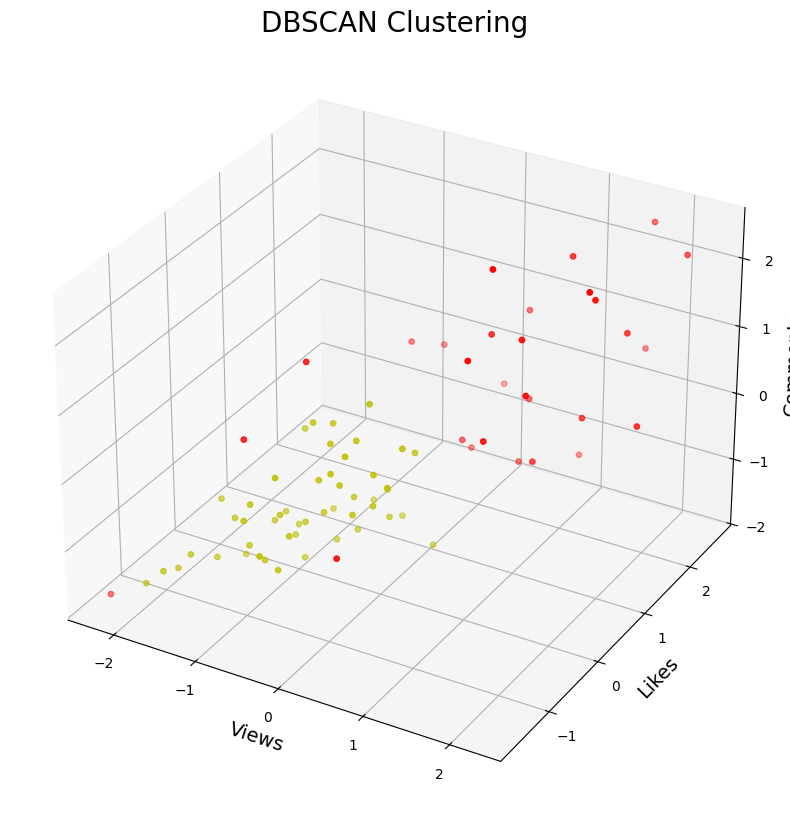

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_transformed['views'], df_transformed['likes'], df_transformed['comments'], c=df_transformed['DBSCAN_labels'], cmap=matplotlib.colors.ListedColormap(colors), s=15)
ax.set_title('DBSCAN Clustering', fontsize=20)
ax.set_xlabel('Views', fontsize=14)
ax.set_ylabel('Likes', fontsize=14)
ax.set_zlabel('Comments', fontsize=14)
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

dbscan_opt = DBSCAN(eps=0.2, min_samples=3)
dbscan_opt.fit(df_transformed)

df_transformed['DBSCAN_opt_labels'] = dbscan_opt.labels_
print(df_transformed['DBSCAN_opt_labels'].value_counts())

DBSCAN_opt_labels
-1    75
 0     3
Name: count, dtype: int64


**EVALUASI**

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Evaluasi K-Means
print("\nK-Means Evaluation:")
kmeans_labels = kmeans.labels_
print(f"Silhouette Score: {silhouette_score(df_transformed, kmeans_labels):.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(df_transformed, kmeans_labels):.4f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_score(df_transformed, kmeans_labels):.2f}")


K-Means Evaluation:
Silhouette Score: 0.2607
Davies-Bouldin Index: 1.6652
Calinski-Harabasz Score: 19.18


In [ ]:
# Evaluasi DBSCAN
dbscan_labels = dbscan.labels_

# Mengecek apakah cluster DBSCAN valid untuk evaluasi (minimal 2 cluster unik)
if len(set(dbscan_labels)) > 1 and -1 in set(dbscan_labels):
    dbscan_labels_filtered = dbscan_labels[df_transformed.index]
    print("\nDBSCAN Evaluation:")
    print(f"Silhouette Score: {silhouette_score(df_transformed, dbscan_labels_filtered):.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin_score(df_transformed, dbscan_labels_filtered):.4f}")
    print(f"Calinski-Harabasz Score: {calinski_harabasz_score(df_transformed, dbscan_labels_filtered):.2f}")
else:
    print("\nDBSCAN Evaluation: Tidak cukup cluster untuk evaluasi (hasil mungkin semua noise atau hanya 1 cluster)")


DBSCAN Evaluation:
Silhouette Score: 0.2245
Davies-Bouldin Index: 1.9137
Calinski-Harabasz Score: 16.61
